# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [7]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import random

In [8]:
class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.array([random.random(), random.random()])
        self.bias = random.random()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return x * (1 - x)

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = sum(weight * input for weight, input in zip(self.weights, inputs)) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                error = Y_train[i] - prediction
                train_error_acum += error ** 2  # Aquí se acumula el cuadrado del error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                self.weights = self.weights + learning_rate * error * self.sigmoid_derivative(prediction) * inputs
                self.bias = self.bias + learning_rate * error

            # Calcular el error promedio por epoch
            train_error_acum = train_error_acum/epochs
            train_error_by_epoch.append(train_error_acum)

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)

                error = Y_validation[i] - prediction
                val_error_acum += error ** 2

            # Calcular el error promedio de validación por epoch
            val_error_acum = val_error_acum/epochs
            val_error_by_epoch.append(val_error_acum)

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()

In [18]:
N_samples = 1000
N_inputs = 2
train_size = 0.8
N_validation = int((1 - train_size) * N_samples)

# Generar los datos
X_data = np.random.randint(2, size=(N_samples, N_inputs))
Y_data = np.prod(X_data, axis=1)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_validation = X_data[N_validation:], X_data[:N_validation]
Y_train, Y_validation = Y_data[N_validation:], Y_data[:N_validation]

# Visualizar algunas muestras de entrenamiento
print("X_train (first 5 samples):")
print(X_train[:5])

print("Y_train (first 5 samples):")
print(Y_train[:5])



X_train (first 5 samples):
[[1 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]]
Y_train (first 5 samples):
[0 1 0 0 0]


In [20]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

epoch: 0 | train error: 0.8532310566668925 | val error: 0.12010744721034174
epoch: 10 | train error: 0.035195759082776605 | val error: 0.008066236510166854
epoch: 20 | train error: 0.015669321174571985 | val error: 0.003727560449719292
epoch: 30 | train error: 0.009825098422837703 | val error: 0.002370940247834802
epoch: 40 | train error: 0.007086518950373979 | val error: 0.001723066647998115
epoch: 50 | train error: 0.005514695989967415 | val error: 0.0013471847394489697
epoch: 60 | train error: 0.00450068091509505 | val error: 0.0011029921800207842
epoch: 70 | train error: 0.003794697584917407 | val error: 0.0009321392399910867
epoch: 80 | train error: 0.003276058157104235 | val error: 0.0008061640084191911
epoch: 90 | train error: 0.0028795470415717466 | val error: 0.0007095795594265061


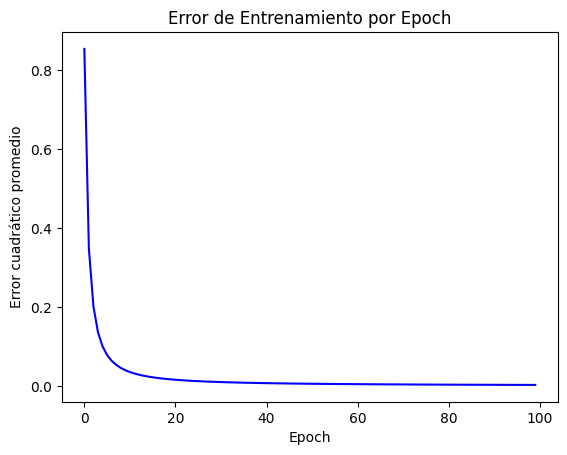

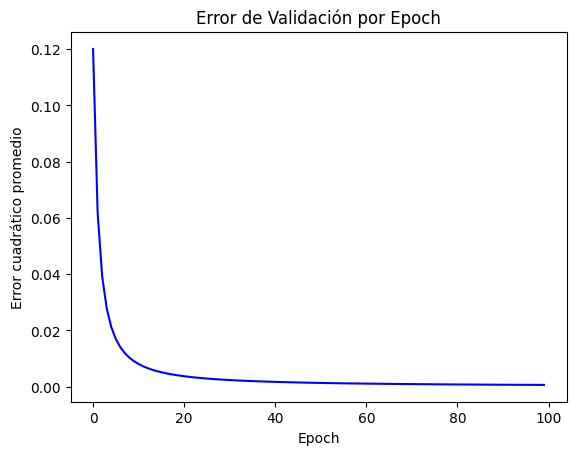

In [21]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

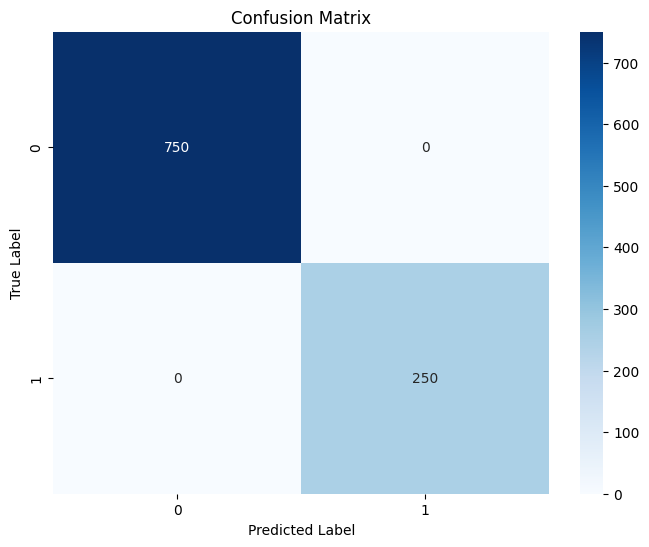

In [33]:
# Obtener las métricas de test del modelo
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ## generar las predicciones
X_test = np.random.randint(2, size=(N_samples, N_inputs))
Y_test = np.prod(X_test, axis=1)

# Generar predicciones correctas
predicted_labels = perceptron_and.predict(X_test)

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(Y_test, predicted_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()